In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

import json

In [2]:
basedir='../examples/Graphene'

# Electronic Band Sructure

In [8]:
with open(basedir +'/el-ph/path_el_bandstructure.json') as jfile:
    data = json.load(jfile)
data = json.loads(data)

indices = np.array(data['highSymIndices'])
indices = indices-1
indices[0] = 0
labels = data['highSymLabels']
qpoints = np.array(data['wavevectorCoordinatesCart'])
energies = np.array(data['energies'])

q_dist_dftb = [0.,]
for i in range(1, qpoints.shape[0]):
    q_dist_dftb.append(np.linalg.norm(qpoints[i,:]-qpoints[i-1,:]))

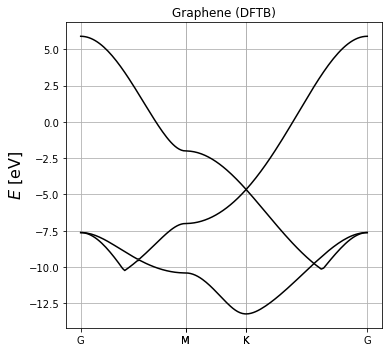

In [29]:
nb0 = 2 # first band to show
nb1 = 4 # last band to show

fig = plt.figure(figsize=(5.5,5))
ax1 = fig.add_subplot(1, 1, 1)

for m in range(nb0, nb1+1):
    ax1.plot(np.cumsum(q_dist_dftb), energies[:, m], color='black')

ax1.set_xticks(np.cumsum(q_dist_dftb)[indices])
ax1.set_xticklabels(labels)
ax1.set_title(r'Graphene (DFTB)')
ax1.set_ylabel(r'$E$ [eV]', fontsize=16)

#plt.legend()
plt.tight_layout()
plt.grid()
#plt.show()
plt.savefig(basedir +'/el-ph/path_el_bandstructure.pdf')

# Phonon Dispersion

In [30]:
with open(basedir +'/el-ph/path_ph_bandstructure.json') as jfile:
    data = json.load(jfile)
data = json.loads(data)

indices = np.array(data['highSymIndices'])
indices = indices-1
indices[0] = 0
labels = data['highSymLabels']
qpoints = np.array(data['wavevectorCoordinatesCart'])
frequencies = np.array(data['frequencies'])

q_dist_dftb = [0.,]
for i in range(1, qpoints.shape[0]):
    q_dist_dftb.append(np.linalg.norm(qpoints[i,:]-qpoints[i-1,:]))

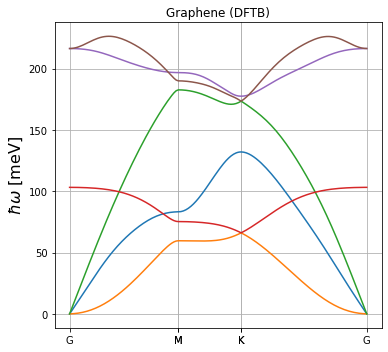

In [31]:
fig = plt.figure(figsize=(5.5,5))
ax1 = fig.add_subplot(1, 1, 1)

for m in range(frequencies.shape[1]):
    ax1.plot(np.cumsum(q_dist_dftb), frequencies[:, m]*1e3)

ax1.set_xticks(np.cumsum(q_dist_dftb)[indices])
ax1.set_xticklabels(labels)
ax1.set_title(r'Graphene (DFTB)')
ax1.set_ylabel(r'$\hbar \omega$ [meV]', fontsize=16)

#plt.legend()
plt.tight_layout()
plt.grid()
#plt.show()
plt.savefig(basedir +'/el-ph/path_ph_bandstructure.pdf')